In [7]:
import os
import tqdm
import torch
import torchvision
from deepface import DeepFace
from lib import Autoencoder, FacesDataset, NoiseScheduler,unet, Demorpher

In [8]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"using device: {device}")

using device: cpu


In [9]:
encoder = torchvision.models.vgg16(pretrained=False) # autoencoder shape
encoder = encoder.features[:11]

autoencoder = Autoencoder(encoder)
autoencoder.load_state_dict(torch.load('ae_Casia_30.pth', map_location=torch.device('cpu')))

<All keys matched successfully>

In [10]:
batch_size = 1

In [11]:
diffusion = unet(1)
diffusion.load_state_dict(torch.load('diffusion_65.pth',map_location=torch.device('cpu')))

<All keys matched successfully>

In [12]:
torch.load('diffusion_73.pth',map_location=torch.device('cpu'))

OrderedDict([('time_proj.0.weight',
              tensor([[-2.2432, -1.4792,  2.5163,  ...,  1.3699,  1.2380,  1.3826],
                      [-3.9403,  2.0248,  3.8196,  ..., -4.0609, -3.9692, -3.9967],
                      [-2.2129, -3.2500, -3.3530,  ..., -2.2897, -2.2016, -2.2926],
                      ...,
                      [-3.9589, -3.8776, -1.5759,  ..., -2.3244, -2.3218, -2.4487],
                      [ 2.3474,  3.2609, -2.1732,  ...,  3.3600,  3.3147,  3.3709],
                      [ 2.3129,  2.2969,  2.2297,  ..., -3.3078, -3.2749, -3.4141]])),
             ('time_proj.0.bias',
              tensor([ 1.3212, -3.9996, -2.3531, -3.1687,  2.3999,  3.2086,  3.2794, -3.9099,
                       3.2240,  3.2607, -2.3146, -3.7761, -4.1935, -3.9910, -2.2585, -3.2224,
                      -2.3296,  0.4070, -2.2059, -2.3332, -3.6931, -3.7254,  2.2806, -2.2655,
                      -2.2846, -2.0621, -2.3014, -2.2603, -1.8558,  2.2801,  3.3989, -2.2675,
                    

In [13]:
scheduler = NoiseScheduler(0.01,0.05,20) 

In [14]:
model = Demorpher(autoencoder.get_encoder(), autoencoder.get_decoder(), diffusion,scheduler)
model.eval() ; 

In [15]:
#FacesDataset = FacesDataset("Dataset/Neutral_Brightness", "Dataset/Morphed_Val_Brightness")
#FacesDataset = FacesDataset("Dataset/Neutral_Brightness", "Dataset/TEST_ON_TRAIN")
FacesDataset = FacesDataset("Dataset/Neutral_Brightness", "Dataset/TEST_ON_BONAFIDE")

Found 1269 identities.


In [16]:
im_a,im_id,im_b, paths = FacesDataset[0]
im_a = im_a.unsqueeze(0).float().to(device)
im_id = im_id.unsqueeze(0).float().to(device)

In [17]:
im_a.shape

torch.Size([1, 3, 224, 224])

In [18]:
im_idout = model(im_a,im_id)

z_ID nan:  tensor(False)
 z_A nan:  tensor(False)
noise nan:  tensor(False)
noise nan:  tensor(False)
noise nan:  tensor(False)
noise nan:  tensor(False)
noise nan:  tensor(False)
noise nan:  tensor(False)
noise nan:  tensor(False)
noise nan:  tensor(False)
noise nan:  tensor(False)
noise nan:  tensor(False)
noise nan:  tensor(False)
noise nan:  tensor(False)
noise nan:  tensor(False)
noise nan:  tensor(False)
noise nan:  tensor(False)
noise nan:  tensor(False)
noise nan:  tensor(False)
noise nan:  tensor(False)
noise nan:  tensor(False)
noise nan:  tensor(False)


In [19]:
im_idout

tensor([[[[0.1827, 0.2302, 0.2723,  ..., 0.7934, 0.6166, 0.4502],
          [0.1952, 0.2494, 0.2881,  ..., 0.7471, 0.4974, 0.3257],
          [0.1951, 0.2651, 0.3146,  ..., 0.6613, 0.3793, 0.1832],
          ...,
          [0.6085, 0.9496, 1.3615,  ..., 1.2257, 1.3604, 1.4263],
          [0.2159, 0.5940, 1.3248,  ..., 1.2059, 1.4108, 1.4682],
          [0.0725, 0.5738, 1.1593,  ..., 1.0568, 1.2895, 1.2681]],

         [[0.2004, 0.2173, 0.2277,  ..., 0.8259, 0.5966, 0.4024],
          [0.2098, 0.2467, 0.2192,  ..., 0.7361, 0.4977, 0.3148],
          [0.2125, 0.2638, 0.2595,  ..., 0.5848, 0.3996, 0.1935],
          ...,
          [0.7305, 1.3225, 0.8625,  ..., 1.1877, 1.2291, 1.2681],
          [0.3545, 0.4793, 0.9588,  ..., 1.0968, 1.1381, 1.2675],
          [0.2528, 0.4582, 0.6206,  ..., 0.9405, 1.1667, 1.1524]],

         [[0.2101, 0.2202, 0.2254,  ..., 0.8350, 0.6074, 0.3967],
          [0.2188, 0.2506, 0.2605,  ..., 0.8285, 0.5033, 0.3471],
          [0.2224, 0.2435, 0.2983,  ..., 0

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-7.947018..21.989744].


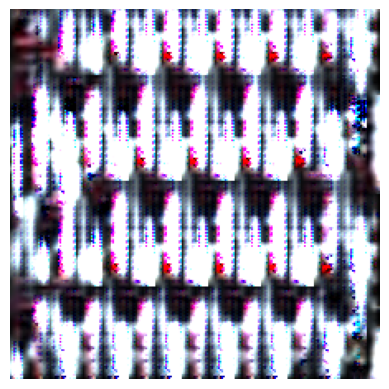

In [20]:
import matplotlib.pyplot as plt

plt.imshow(im_idout.squeeze().permute(1, 2, 0).detach().numpy())
plt.axis('off')
plt.show()

In [ ]:
out = DeepFace.verify( img1_path = im_b.detach().numpy(), img2_path = im_idout.detach().numpy(), threshold=0.5)
out2 = DeepFace.verify( img1_path = im_a.detach().numpy(), img2_path = im_idout.detach().numpy(), threshold=0.5)

In [ ]:
out

In [ ]:
out2

In [ ]:
for im_a,im_id,im_b, paths in tqdm(FacesDataset):
    im_idout = model(im_a,im_id)
    out = DeepFace.verify( img1_path = im_b, img2_path = im_idout, threshold=0.5)